In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import seaborn as sns
import warnings

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.layers import Conv2D
from keras.regularizers import l2

import pickle

In [2]:
pickle_in = open("X_train_Numerical.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_Numerical.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test_Numerical.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test_Numerical.pickle","rb")
y_test = pickle.load(pickle_in)

In [3]:
ann = Sequential()
ann.add(Dropout(0.001))
ann.add(Dense(units=2500, activation='relu'))
ann.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#checkpoint to hold the best weights found yet
checkpoint = keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
historic =ann.fit(X_train, y_train, batch_size = 32, epochs = 10,validation_split=0.2, verbose=1, callbacks=[checkpoint])
print(ann.evaluate(X_test, y_test))
print(ann.metrics_names)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3983/4000 [============================>.] - ETA: 0s - loss: 0.0877 - accuracy: 0.9736
Epoch 00001: val_loss improved from inf to 0.06483, saving model to weights.h5
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.0648 - val_accuracy: 0.9795
Epoch 2/10
3978/4000 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9791
Epoch 00002: val_loss improved from 0.06483 to 0.05898, saving model to weights.h5
4000/4000 [=====

In [4]:
from keras.models import load_model
ann.save('ann.h5')
#ann = load_model("ann.h5")

In [5]:
from sklearn.neural_network import MLPClassifier
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)

[[ 1698   277]
 [  275 37751]]


0.9862003449913752

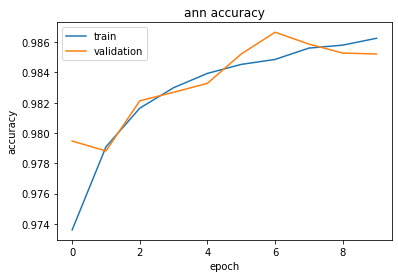

In [7]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('ann accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

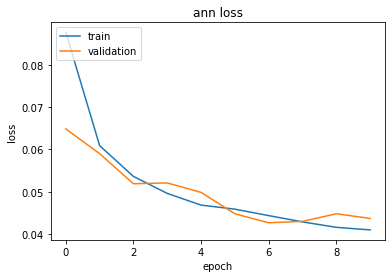

In [8]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('ann loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

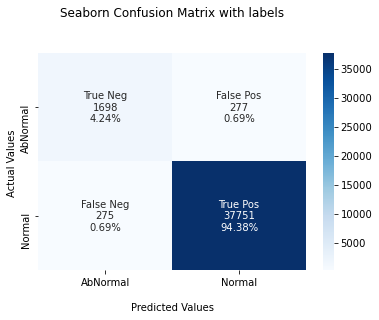

In [16]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['AbNormal','Normal'])
ax.yaxis.set_ticklabels(['AbNormal','Normal'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
historic = classifier.fit(X_train, y_train)

In [11]:
y_pred_svm = classifier.predict(X_test)
y_pred_svm = (y_pred_svm > 0.5)

In [12]:
y_pred_svm = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test, y_pred_svm)

[[ 1200   775]
 [  302 37724]]


0.9730756731081723

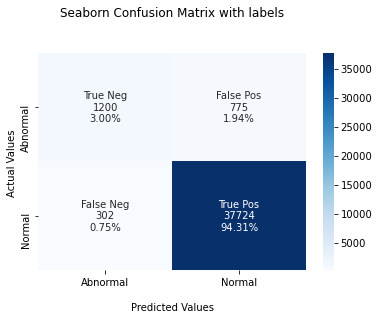

In [17]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_svm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Abnormal','Normal'])
ax.yaxis.set_ticklabels(['Abnormal','Normal'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)

auc_ann = auc(fpr_ann, tpr_ann)
auc_svm = auc(fpr_svm, tpr_svm)

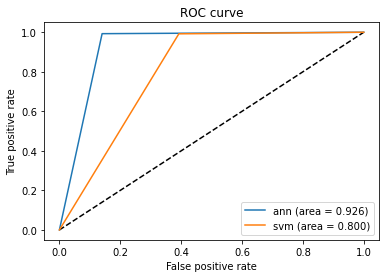

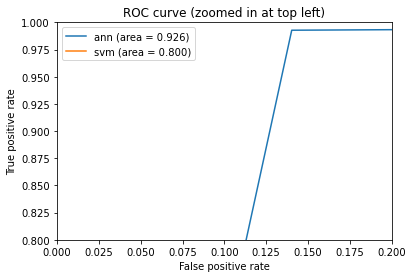

In [15]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='ann (area = {:.3f})'.format(auc_ann))
plt.plot(fpr_svm, tpr_svm, label='svm (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='ann (area = {:.3f})'.format(auc_ann))
plt.plot(fpr_svm, tpr_svm, label='svm (area = {:.3f})'.format(auc_svm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()